In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df3=pd.read_csv('gender_submission.csv')
#df1.describe(include='all')

In [3]:
print(df1.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(pd.isnull(df1).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


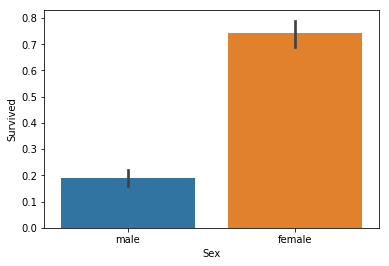

In [6]:
sns.barplot(x='Sex',y='Survived',data=df1)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df1["Survived"][df1["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df1["Survived"][df1["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 3 who survived: 24.2362525458


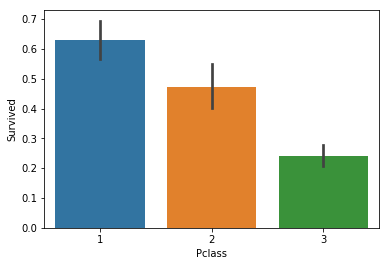

In [7]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df1)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df1["Survived"][df1["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df1["Survived"][df1["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df1["Survived"][df1["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.5394736842
Percentage of SibSp = 1 who survived: 53.5885167464
Percentage of SibSp = 2 who survived: 46.4285714286


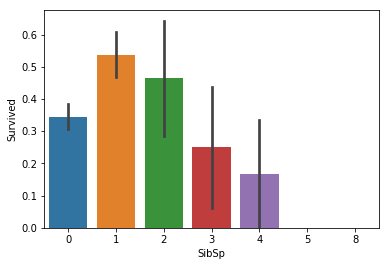

In [8]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df1)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df1["Survived"][df1["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df1["Survived"][df1["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df1["Survived"][df1["SibSp"] == 2].value_counts(normalize = True)[1]*100)


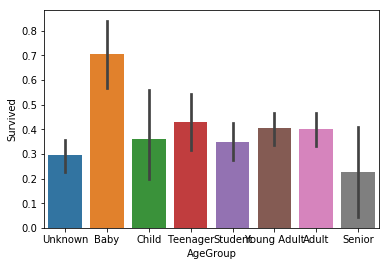

In [9]:
df1['Age']=df1['Age'].fillna(-0.5)
df2['Age']=df2['Age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df1['AgeGroup'] = pd.cut(df1["Age"], bins, labels = labels)
df2['AgeGroup'] = pd.cut(df2["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df1)
plt.show()

Percentage of CabinBool = 1 who survived: 66.6666666667
Percentage of CabinBool = 0 who survived: 29.9854439592


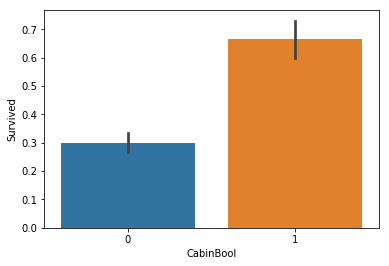

In [10]:
df1["CabinBool"] = (df1["Cabin"].notnull().astype('int'))
df2["CabinBool"] = (df2["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", df1["Survived"][df1["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", df1["Survived"][df1["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=df1)
plt.show()

In [11]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [12]:
df1.drop('Cabin',axis=1,inplace=True)
df2.drop('Cabin',axis=1,inplace=True)

In [13]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,0


In [14]:
df1.drop('Ticket',axis=1,inplace=True)
df2.drop('Ticket',axis=1,inplace=True)

In [15]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df1[df1["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df1[df1["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df1[df1["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [16]:
df1 = df1.fillna({"Embarked": "S"})

In [17]:
combine = [df1,df2]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df1['Title'], df1['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df1[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [19]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [20]:
# fill missing age with mode age group for each title
mr_age = df1[df1["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = df1[df1["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = df1[df1["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = df1[df1["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = df1[df1["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = df1[df1["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(df1["AgeGroup"])):
    if df1["AgeGroup"][x] == "Unknown":
        df1["AgeGroup"][x] = age_title_mapping[df1["Title"][x]]
        
for x in range(len(df2["AgeGroup"])):
    if df2["AgeGroup"][x] == "Unknown":
        df2["AgeGroup"][x] = age_title_mapping[df2["Title"][x]]

In [21]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df1['AgeGroup'] = df1['AgeGroup'].map(age_mapping)
df2['AgeGroup'] = df2['AgeGroup'].map(age_mapping)

df1.head()

#dropping the Age feature for now, might change
df1 = df1.drop(['Age'], axis = 1)
df2 = df2.drop(['Age'], axis = 1)

In [22]:
#drop the name feature since it contains no more useful information.
df1 = df1.drop(['Name'], axis = 1)
df2 = df2.drop(['Name'], axis = 1)

In [23]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df1['Sex'] = df1['Sex'].map(sex_mapping)
df2['Sex'] = df2['Sex'].map(sex_mapping)

df1.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


In [24]:
df1.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1
1,2,1,1,1,1,0,71.2833,C,6,1,3
2,3,1,3,1,0,0,7.9250,S,5,0,2
3,4,1,1,1,1,0,53.1000,S,5,1,3
4,5,0,3,0,0,0,8.0500,S,5,0,1


In [25]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df1['Embarked'] = df1['Embarked'].map(embarked_mapping)
df2['Embarked'] = df2['Embarked'].map(embarked_mapping)

df1.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4,0,1
1,2,1,1,1,1,0,71.2833,2,6,1,3
2,3,1,3,1,0,0,7.9250,1,5,0,2
3,4,1,1,1,1,0,53.1000,1,5,1,3
4,5,0,3,0,0,0,8.0500,1,5,0,1


In [26]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(df2["Fare"])):
    if pd.isnull(df2["Fare"][x]):
        pclass = df2["Pclass"][x] #Pclass = 3
        df2["Fare"][x] = round(df1[df1["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
df1['FareBand'] = pd.qcut(df1['Fare'], 4, labels = [1, 2, 3, 4])
df2['FareBand'] = pd.qcut(df2['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
df1 =df1.drop(['Fare'], axis = 1)
df2 =df2.drop(['Fare'], axis = 1)

In [27]:
#check train data
df1.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [28]:
df2.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


In [29]:
from sklearn.model_selection import train_test_split

predictors = df1.drop(['Survived', 'PassengerId'], axis=1)
target = df1["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

In [30]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.03


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.48


In [32]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.61


In [33]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.13


In [34]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

76.23


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.82


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.06


In [37]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.61


In [38]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.03


In [39]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.06


In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.06
9,Gradient Boosting Classifier,82.06
0,Support Vector Machines,81.61
1,KNN,81.61
7,Decision Tree,79.82
2,Logistic Regression,78.48
4,Naive Bayes,78.03
8,Stochastic Gradient Descent,78.03
6,Linear SVC,77.13
5,Perceptron,76.23


In [41]:
#set ids as PassengerId and predict survival 
ids = df2['PassengerId']
predictions = randomforest.predict(df2.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
df4 = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
df4.to_csv('sol2.csv', index=False)